First Lets import the data, it was loaded on Watson and has private credentials so it will only shows the first 5 lines of the dataframe (The dataframe is called df)

In [1]:
# The code was removed by Watson Studio for sharing.

,Distrito censal,Población (2002),Superficie (km²)
0,Puerto,2 744,1.2
1,Regimiento,3 880,0.7
2,Chinchorro,12 816,13.3
3,San José,13 216,1.2
4,Población Chile,9 086,17.3


Lets Change the names to it to be more understable

In [2]:

df.columns=('District','Population','Area')
df.head(1)

,District,Population,Area
0,Puerto,2 744,1.2


Delete the unuseful data, in this case the area of each District will not help us to get the best place to open a Cafe Shop

In [3]:
df.drop(columns='Area',inplace=True)
df.head(1)

,District,Population
0,Puerto,2 744


 Now the Latitude and Longitude Handly extracted from wikipedia will be merged with the Dataframe

In [4]:
df['Latitude']=(-18.476137,-18.472886,-18.465493,-18.470838,-18.473893,-18.466193,-18.481534,-18.487754,-18.478699,-18.482093,-18.477089,-18.492236,-18.772727,-18.481568,-18.399849,-18.451736,-18.452575,-18.436016,-18.485908)
df['Longitude']=(-70.320458,-70.312322,-70.302521,-70.292194,-70.285912,-70.278426,-70.289966,-70.298611,-70.297719,-70.302790,-70.306425,-70.306770,-70.225339,-70.314910,-70.312870,-70.066187,-70.286289,-70.289837,-70.278773)
df.head(1)

,District,Population,Latitude,Longitude
0,Puerto,2 744,-18.476137,-70.320458


Refine the data, as you can see below the population has hidden characters, lets change it by the original values

In [5]:
df.iloc[0,1]


'2\xa0744'

In [6]:
df['Population']=(2744,3880,12816,13216,9086,14991,11984,10525,4934,5836,6358,28209,223,3826,1684,649,25131,17530,11878)
df.iloc[0,1]

2744

Lets add the income per District, this info is found in the INE census data but is cathaloged as Low,midlow,mid,midhigh,high. So it will be added in a numeric format where 1=high and 0=low, every income increase mean a +0.25

In [7]:
df['Income']=(0.5,0.5,0.75,0.5,0.25,0.5,0.5,0.75,0.5,0.5,0.5,0.5,0.5,0.75,0.25,0.25,0.5,0.25,0.5)

In [8]:
df.head()


,District,Population,Latitude,Longitude,Income
0,Puerto,2744,-18.476137,-70.320458,0.50
1,Regimiento,3880,-18.472886,-70.312322,0.50
2,Chinchorro,12816,-18.465493,-70.302521,0.75
3,San José,13216,-18.470838,-70.292194,0.50
4,Población Chile,9086,-18.473893,-70.285912,0.25


### Lets Visualize some relations

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

Lets normalize the data in the population columns

In [10]:
# Create x, where x the 'scores' column's values as floats
x = df[['Population']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['Income']=df['Income']
df_normalized.columns=('Population','Income')

In [11]:
df_normalized.head()

,Population,Income
0,0.090081,0.50
1,0.130672,0.50
2,0.449975,0.75
3,0.464268,0.50
4,0.316694,0.25


### Population V/s Income

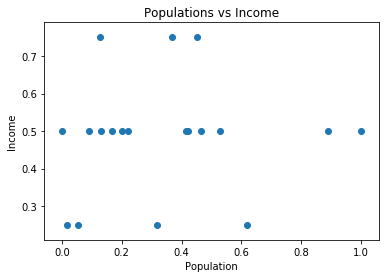

In [12]:
plt.scatter(x='Population',y='Income',data=df_normalized)
plt.title("Populations vs Income")
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

As you can see there is no actual relation between the income and number of Habitants.

### Number of habitants per District

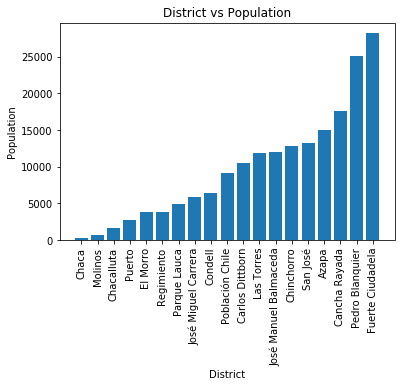

In [13]:

plt.bar('District','Population',data=df.sort_values('Population'))
plt.xticks(rotation=90)
plt.title("District vs Population")
plt.xlabel("District")
plt.ylabel("Population")
plt.show()

There are areas with a large amount of people that could increase the amount of potential clients

# Map Visualization

## Lets import the libraries


In [14]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [15]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0          conda-forge
    geopy:         2.0.0-pyh9f0ad1d_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-2.0.0          | 63 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


Find Arica adress using Geopy

In [16]:
address = 'Arica,Arica y parinacota'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of arica are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of arica are -18.478518, -70.3210596.


Use Folium to Map Arica and incorporate each district to the map

In [17]:
map_arica = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arica)  

In [18]:
map_arica

As you can observe there are District that are too far away from the city (Chacas and Molinos) so they are going to be dropped from the data because the idea is to have the Cafe near the city

In [19]:
df=df.drop(index=[12,15])
df.reset_index(drop=True)

,District,Population,Latitude,Longitude,Income
0,Puerto,2744,-18.476137,-70.320458,0.50
1,Regimiento,3880,-18.472886,-70.312322,0.50
2,Chinchorro,12816,-18.465493,-70.302521,0.75
3,San José,13216,-18.470838,-70.292194,0.50
4,Población Chile,9086,-18.473893,-70.285912,0.25
5,Azapa,14991,-18.466193,-70.278426,0.50
6,José Manuel Balmaceda,11984,-18.481534,-70.289966,0.50
7,Carlos Dittborn,10525,-18.487754,-70.298611,0.75
8,Parque Lauca,4934,-18.478699,-70.297719,0.50
9,José Miguel Carrera,5836,-18.482093,-70.302790,0.50


### Lets visualize the new map

In [20]:
map_arica = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arica)  

In [21]:
map_arica

as one of the objective is to have people with enough income to buy in a Cafe Frequently, any District with income lower than 0.5 will be dropped

### lets call and drop all the rows that doesnt fulfill the >0.5 condition


In [22]:
indexNames = df[ df['Income']< 0.5 ].index
df.drop(indexNames , inplace=True)
df.reset_index(drop=True)

,District,Population,Latitude,Longitude,Income
0,Puerto,2744,-18.476137,-70.320458,0.50
1,Regimiento,3880,-18.472886,-70.312322,0.50
2,Chinchorro,12816,-18.465493,-70.302521,0.75
3,San José,13216,-18.470838,-70.292194,0.50
4,Azapa,14991,-18.466193,-70.278426,0.50
5,José Manuel Balmaceda,11984,-18.481534,-70.289966,0.50
6,Carlos Dittborn,10525,-18.487754,-70.298611,0.75
7,Parque Lauca,4934,-18.478699,-70.297719,0.50
8,José Miguel Carrera,5836,-18.482093,-70.302790,0.50
9,Condell,6358,-18.477089,-70.306425,0.50


#### map the new results

In [23]:
map_arica = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, district in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arica)  

This is the final Map

In [24]:
map_arica

# Lets use the foursquare API to find Venues near each district

In [25]:
import requests # library to handle requests

Credentials


In [26]:
CLIENT_ID = 'CT0MUFS12ORQBI4OECTNQZU2BHPHHALTZQDRO3CXWYZJ31FX' # your Foursquare ID
CLIENT_SECRET = 'JJGSLAX1UDFCT4CVFBXQMNJLBW503O3OCOUZGEL4SIZS2S1Z' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

#### function to get each district near venues


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Lets use the function

In [28]:
arica_venues = getNearbyVenues(names=df['District'],latitudes=df['Latitude'],longitudes=df['Longitude'])

Puerto
Regimiento
Chinchorro
San José
Azapa
José Manuel Balmaceda
Carlos Dittborn
Parque Lauca
José Miguel Carrera
Condell
Fuerte Ciudadela
El Morro
Pedro Blanquier
Las Torres


In [29]:
arica_venues.shape
arica_venues.head()


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Puerto,-18.476137,-70.320458,La Fontana,-18.478271,-70.320137,Ice Cream Shop
1,Puerto,-18.476137,-70.320458,Zumería,-18.478336,-70.320519,Vegetarian / Vegan Restaurant
2,Puerto,-18.476137,-70.320458,Pub Bar Karaoke K21 / Club 21,-18.477450,-70.319869,Pub
3,Puerto,-18.476137,-70.320458,Boulevard Vereda Bolognesi,-18.478280,-70.319964,Other Great Outdoors
4,Puerto,-18.476137,-70.320458,Paseo Bolognesi,-18.477286,-70.319243,Outdoors & Recreation


Count of number of venues per district

In [31]:

venue=arica_venues.groupby('District').count().reset_index()
venue

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Azapa,4,4,4,4,4,4
1,Carlos Dittborn,5,5,5,5,5,5
2,Chinchorro,20,20,20,20,20,20
3,Condell,11,11,11,11,11,11
4,El Morro,33,33,33,33,33,33
5,Fuerte Ciudadela,5,5,5,5,5,5
6,José Manuel Balmaceda,7,7,7,7,7,7
7,José Miguel Carrera,9,9,9,9,9,9
8,Parque Lauca,9,9,9,9,9,9
9,Pedro Blanquier,4,4,4,4,4,4


<BarContainer object of 13 artists>

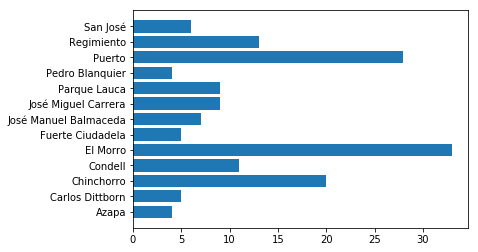

In [32]:
plt.barh('District','Venue',data=venue)

Find Venue that match the name Café or Coffee shop that are the ways that Foursquare identify the data

In [33]:
arica_venues[arica_venues['Venue Category']=='Café'].index


Int64Index([13], dtype='int64')

In [34]:
arica_venues[arica_venues['Venue Category']=='Coffee Shop'].index


Int64Index([18, 70], dtype='int64')

In [35]:
cafe=arica_venues.iloc[[13 , 18, 142 ] , : ]
cafe

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
13,Puerto,-18.476137,-70.320458,Benaki,-18.477841,-70.319844,Café
18,Puerto,-18.476137,-70.320458,Café del Mar,-18.478226,-70.319157,Coffee Shop
142,El Morro,-18.481568,-70.314910,Farmacias Cruz Verde,-18.482873,-70.311846,Pharmacy


Lets map the coffee

In [36]:
map_cafe = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, cafe in zip(cafe['Venue Latitude'], cafe['Venue Longitude'], cafe['Venue']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cafe)  

In [37]:
map_cafe


as you can see the only 3 cafes in the city are located 2 in Puerto and 1 in El morro, and if you remember these are the District with the higher number of venues, revealing that there is a correlation between Cafes and economic centers.

In [46]:
venue.sort_values('Venue', ascending=False).head()


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,El Morro,33,33,33,33,33,33
10,Puerto,28,28,28,28,28,28
2,Chinchorro,20,20,20,20,20,20
11,Regimiento,13,13,13,13,13,13
3,Condell,11,11,11,11,11,11


## Lets find the best District to place a Cafe

the conditions are:
    a) high income (0.75)
    b) great presence of venues (>10)
    c) low amount of Cafe (<1)
    d)large amount of population (>10k)

### Income

In [47]:
df[df['Income']>=0.75]

,District,Population,Latitude,Longitude,Income
2,Chinchorro,12816,-18.465493,-70.302521,0.75
7,Carlos Dittborn,10525,-18.487754,-70.298611,0.75
13,El Morro,3826,-18.481568,-70.314910,0.75


### Venues

In [49]:
venue[venue['Venue']>=10]

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Chinchorro,20,20,20,20,20,20
3,Condell,11,11,11,11,11,11
4,El Morro,33,33,33,33,33,33
10,Puerto,28,28,28,28,28,28
11,Regimiento,13,13,13,13,13,13


### Amount of Cafe

The only districts that have Cafe are El morro and Puerto, all the others fulfill the requierements

### Population

In [50]:
df[df['Population']>=10000]

,District,Population,Latitude,Longitude,Income
2,Chinchorro,12816,-18.465493,-70.302521,0.75
3,San José,13216,-18.470838,-70.292194,0.50
5,Azapa,14991,-18.466193,-70.278426,0.50
6,José Manuel Balmaceda,11984,-18.481534,-70.289966,0.50
7,Carlos Dittborn,10525,-18.487754,-70.298611,0.75
11,Fuerte Ciudadela,28209,-18.492236,-70.306770,0.50
16,Pedro Blanquier,25131,-18.452575,-70.286289,0.50
18,Las Torres,11878,-18.485908,-70.278773,0.50


After looking for the conditions the only one that fulfills all of them is the Chinchorro district, having an income of 0.75, 0 cafes, 12816 habitants and 20 venues

## this is only based on statistics, sadly in my city there are more Cafe that doesnt appear in foursquare so the analysis isn t the best possible but as habitant of the city i know that actually Chinchorro is a Beach Sector with a lot of affluent public and high mean income. So according from my experience it could be one of the best possible places to place a cafe

## Thanks for reading